In [2]:
import numpy as np

# Задание

Смоделировать игру против лотерейного автомата типа “777”. Игрок платит 1 руб., после чего выпадает случайное целое число, равномерно распределенное от 0 до 999. При некоторых значениях числа игрок получает выигрыш (см. справа).  

Выгодна ли игра игроку?  

Сколько в среднем приобретает  
или теряет игрок за одну игру?  

777: 200 руб.  
999: 100 руб.  
555: 50 руб.  
333: 15 руб.  
111: 10 руб.  
*77: 5 руб.  
**7: 3 руб.  
*00: 2 руб.  
**0: 1 руб.  

* – любая цифра  
Дополнительное задание повышенной сложности. Теоретически рассчитать средний выигрыш (проигрыш) и сравнить с результатами моделирования  

In [13]:
money_total = 1000000   # Количество попыток, оно же сумма ставок 
win = 0    # Количество успехов
loss = 0   # Количество проигрышей

#money_total = int(input('Введите сумму оплаты лотереи'))

winning_amount = 0

for i in range(money_total):
    random_score = np.random.randint(0, 1000)    # Случайное количество очков от 1 до 999
    if random_score == 777:   # 1 число
        win += 1
        winning_amount += 200
    elif random_score == 999: # 1 число
        win += 1
        winning_amount += 100
    elif random_score == 555: # 1 число 
        win += 1
        winning_amount += 50
    elif random_score == 333: # 1 число
        win += 1
        winning_amount += 15
    elif random_score == 111: # 1 число
        win += 1
        winning_amount += 10
    elif random_score%100 == 77 and random_score != 777: # 9 чисел
        win += 1
        winning_amount += 5
    elif random_score%10 == 7: # 90 чисел
        win += 1
        winning_amount += 3
    elif random_score%100 == 0: # 10 чисел
        win += 1
        winning_amount += 2
    elif random_score%10 == 0: # 90 чисел
        win += 1
        winning_amount += 1
    else:
        loss += 1

if winning_amount > 0:
    print('Ваш выигрыш составил:', winning_amount, 'руб.')
else:
    print('Вы проиграли:(')

p = 204 / 1000                                  # Теоретическая вероятность
p_monte_carlo = win / money_total             # Вероятность из моделирования
winning_model = winning_amount / money_total  # средний выигрыш за одну игру


print(f'Количество побед: {win}. Проигрыш: {loss} руб.. Ставка: {money_total} руб.')
print(f'Теоретическая вероятность: {p}. Вероятность из моделирования: {p_monte_carlo}. Средний выигрыш за одну игру: {round(100*winning_model)} копеек.') 
print(f'Средняя потеря за одну игру: {round(100*(1-winning_model))} копеек')

Ваш выигрыш составил: 798246 руб.
Количество побед: 203754. Проигрыш: 796246 руб.. Ставка: 1000000 руб.
Теоретическая вероятность: 0.204. Вероятность из моделирования: 0.203754. Средний выигрыш за одну игру: 80 копеек.
Средняя потеря за одну игру: 20 копеек


In [14]:
def shoot():
    return np.random.randint(0, 1000)

(array([ 91., 108.,  97.,  84., 108., 121.,  98., 102.,  91., 100.]),
 array([  1. , 100.8, 200.6, 300.4, 400.2, 500. , 599.8, 699.6, 799.4,
        899.2, 999. ]),
 <BarContainer object of 10 artists>)

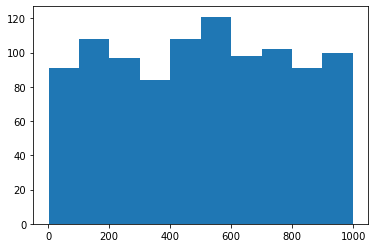

In [15]:
# Построим  график выпадения чисел от 0 до 999:

from matplotlib import pyplot as plt
%matplotlib inline
y = [ shoot() for v in range(1000) ]
plt.hist(y)

# Выводы:

### Вопрос 1: Выгодна ли игроку игра?
Ответ: Игра игроку не выгодна.

### Вопрос 2: Сколько в среднем приобретает или теряет игрок за одну игру?
Ответ: Игрок за одну игру теряет сумму платы за игру, то есть 1 рубль потери за каждую проигрышную игру. Игрок ничего не приобретает за одну игру так как для одной игры вероятность выигрыша сильно мала.

# Дополнительное задание
Теоретически рассчитать средний
выигрыш (проигрыш) и сравнить с результатами
моделирования

In [16]:
# среднее значение выигрыша

winning_sum = [200, 100, 50, 15, 10, 5, 3, 2, 1]
winning=0

for i in winning_sum:
    x = p * i + (1-p)*0
    winning += x
print(winning)

78.74399999999999


In [17]:
# среднее значение проигрыша
winning_sum = [200, 100, 50, 15, 10, 5, 3, 2, 1]
lossing=0
p_2 = 1-p

for i in winning_sum:
    x = p_2 * 0 + (1-p) * i
    lossing += x
print(lossing)

307.256


In [18]:
# среднее значение выигрыша при моделировании 
winning_model = winning_amount / money_total
print(f'Средний выигрыш за одну игру: {round(100*winning_model)} копеек.')

Средний выигрыш за одну игру: 80 копеек.


In [19]:
# среднее значение проигрыша при моделировании 
print(f'Средняя потеря за одну игру: {round(100*(1-winning_model))} копеек')

Средняя потеря за одну игру: 20 копеек


In [21]:
#определим вероятность каждого выигрышного исхода и воспользуемся формулой P1*X1 + P2*X2 + ... + Pn*Xn  :

victory = 0.001*(200 + 100 + 50 + 15 + 10) + (9/1000)*5 + (10/1000)*2 + ((99-9)/1000)*3 + ((100-10)/1000)*1
victory

0.7999999999999999